<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project9/Assingment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os
sys.path.append("/content/gdrive/My Drive/Colab Notebooks/EVA/Assingment9")
working_path = '/content/gdrive/My Drive/Colab Notebooks/EVA/Assingment9'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [86]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(test_labels))
print(num_classes)

10


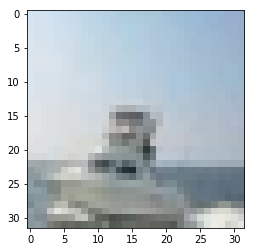

In [87]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(train_features[100])

In [88]:
import keras.models
model = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/EVA/Assingment9/best.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36864     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
__________

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
import cv2

(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
2
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)


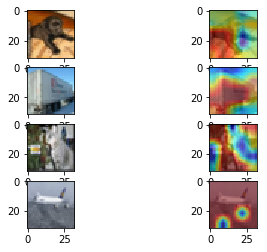

In [90]:
var=[56,15,78,199]
j=1
for i in var:
  dog= train_features[i]
  #dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  #x = image.img_to_array(dog)
  x = np.expand_dims(dog, axis=0)
  x = preprocess_input(x)
  print(x.shape)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  plt.subplot(4,2,j)
  plt.imshow(dog)
  plt.subplot(4,2,j+1)
  plt.imshow(superimposed_img)
  j=j+2

In [91]:
model1 = keras.models.load_model('/content/gdrive/My Drive/Colab Notebooks/EVA/Assingment9/cutout.hdf5')
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36864     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 64)        0         
__________

(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
1
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)
(1, 32, 32, 3)
2
(?, 5, 5, 64)
(64,)
(5, 5, 64)
(5, 5)


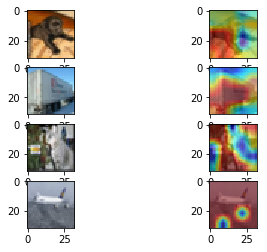

In [92]:
j=1
for i in var:
  dog= train_features[i]
  #dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  #x = image.img_to_array(dog)
  x = np.expand_dims(dog, axis=0)
  x = preprocess_input(x)
  print(x.shape)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  plt.subplot(4,2,j)
  plt.imshow(dog)
  plt.subplot(4,2,j+1)
  plt.imshow(superimposed_img)
  j=j+2